In [1]:
%pip install pymysql
%pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 132.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 1.8 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247951 sha256=d235813de85520110030e8e42a3c2bd2b1d475f3c482627db68a5fbf8d81171f
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

In [27]:
engine = create_engine('mysql+mysqlconnector://root:asutp@db/asutp', echo=False)

data = pd.read_sql("SELECT * FROM `Data`", engine)

data.index = data['id']

data.pop('id')

data

,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps
id,,,,,,
1,2022-05-20,35618,18964,15022,1632,NPS_1
2,2022-05-29,13275,9001,3947,327,NPS_1
3,2022-05-02,49305,33512,15785,8,NPS_1
4,2022-05-03,10553,7647,2885,21,NPS_1
5,2022-05-23,20994,11652,8548,794,NPS_1
...,...,...,...,...,...,...
451,2022-04-17,3733,2579,745,409,NPS_3
452,2022-04-08,3272,2316,831,125,NPS_3
453,2022-04-18,2975,2141,636,198,NPS_3


In [28]:
data = data[data.nps == 'NPS_1']

In [29]:
# Подключение визуализации
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pylab as pl
from matplotlib import ticker
from datetime import date

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='id'>

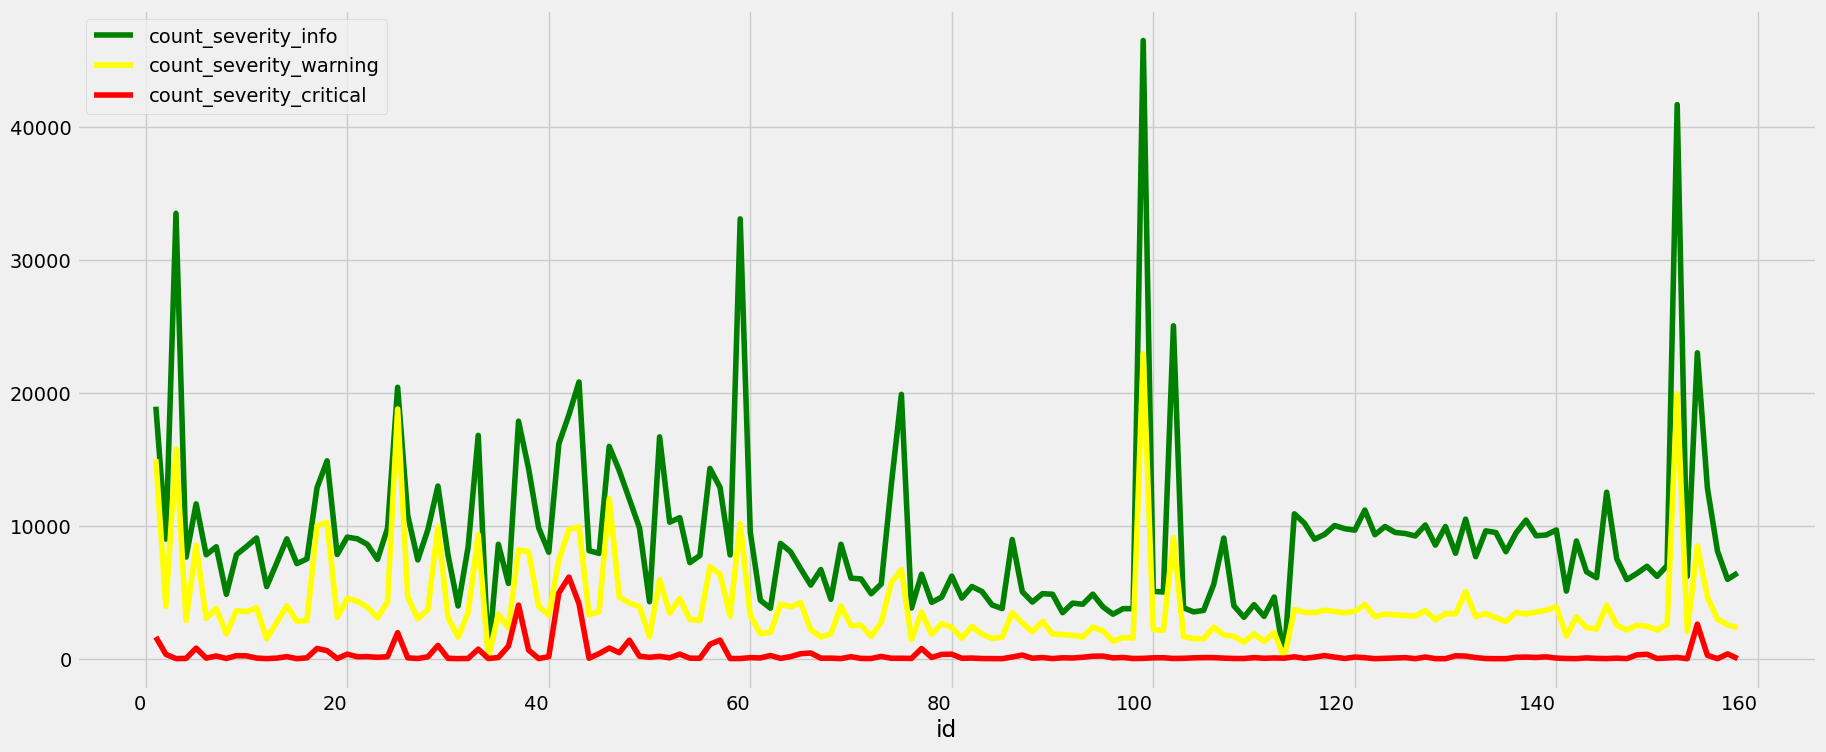

In [30]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='count_severity_info',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='count_severity_warning',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='count_severity_critical',color='red', ax=ax)

In [40]:
def ratio_count(data, severity_name):
    data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']

In [41]:
ratio_count(data, 'severity_info')
ratio_count(data, 'severity_warning')
ratio_count(data, 'severity_critical')

/tmp/ipykernel_79595/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']
/tmp/ipykernel_79595/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']
/tmp/ipykernel_79595/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [42]:
from numpy import sqrt

# Коэффициент выравнивающий масштаб аварийных и предупредительных сообщений**
A = 2

# Функция расчёта модели показателя нештатной работоспособности станции
def state(data):
    data['state'] = sqrt((A*data['ratio_count_severity_critical'])**2 + data['ratio_count_severity_warning']**2)

In [43]:
state(data)

/tmp/ipykernel_79595/219802365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state'] = sqrt((A*data['ratio_count_severity_critical'])**2 + data['ratio_count_severity_warning']**2)


In [45]:


data['state_normalized'] = (data['state'] - data['state'].min()) / (data['state'].max() - data['state'].min())
data

/tmp/ipykernel_79595/3572731576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_normalized'] = (data['state'] - data['state'].min()) / (data['state'].max() - data['state'].min())


,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps,count_total_normalized,count_severity_info_normalized,count_severity_warning_normalized,count_severity_critical_normalized,ratio_count_severity_info,ratio_count_severity_warning,ratio_count_severity_critical,state,state_normalized
id,,,,,,,,,,,,,,,
1,2022-05-20,35618,18964,15022,1632,NPS_1,0.511705,0.406802,0.654066,0.265386,0.532427,0.421753,0.045820,0.431594,0.584203
2,2022-05-29,13275,9001,3947,327,NPS_1,0.189630,0.192337,0.170632,0.052914,0.678041,0.297326,0.024633,0.301380,0.299680
3,2022-05-02,49305,33512,15785,8,NPS_1,0.709004,0.719966,0.687372,0.000977,0.679688,0.320150,0.000162,0.320150,0.340694
4,2022-05-03,10553,7647,2885,21,NPS_1,0.150392,0.163190,0.124274,0.003093,0.724628,0.273382,0.001990,0.273411,0.238567
5,2022-05-23,20994,11652,8548,794,NPS_1,0.300899,0.249403,0.371470,0.128948,0.555016,0.407164,0.037820,0.414130,0.546044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022-03-23,34099,23017,8481,2601,NPS_1,0.489809,0.494048,0.368545,0.423152,0.675005,0.248717,0.076278,0.291776,0.278696
155,2022-03-24,17740,12836,4648,256,NPS_1,0.253993,0.274890,0.201231,0.041355,0.723563,0.262007,0.014431,0.263592,0.217111
156,2022-03-30,11069,8091,2976,2,NPS_1,0.157830,0.172748,0.128247,0.000000,0.730960,0.268859,0.000181,0.268859,0.228621


<AxesSubplot:xlabel='id'>

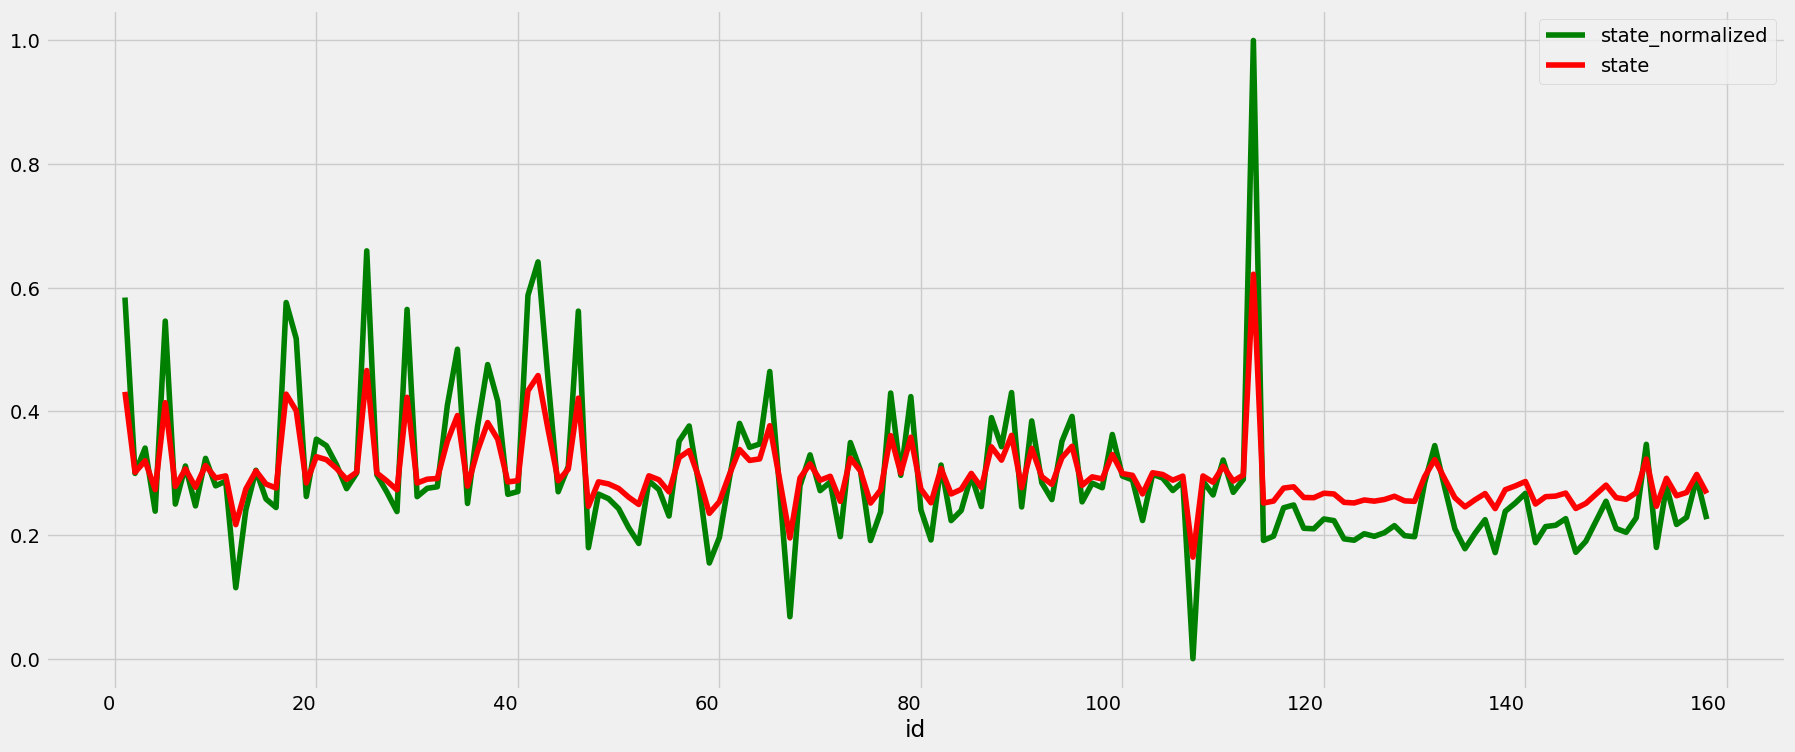

In [48]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='state_normalized',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='state',color='red', ax=ax)

<AxesSubplot:xlabel='id'>

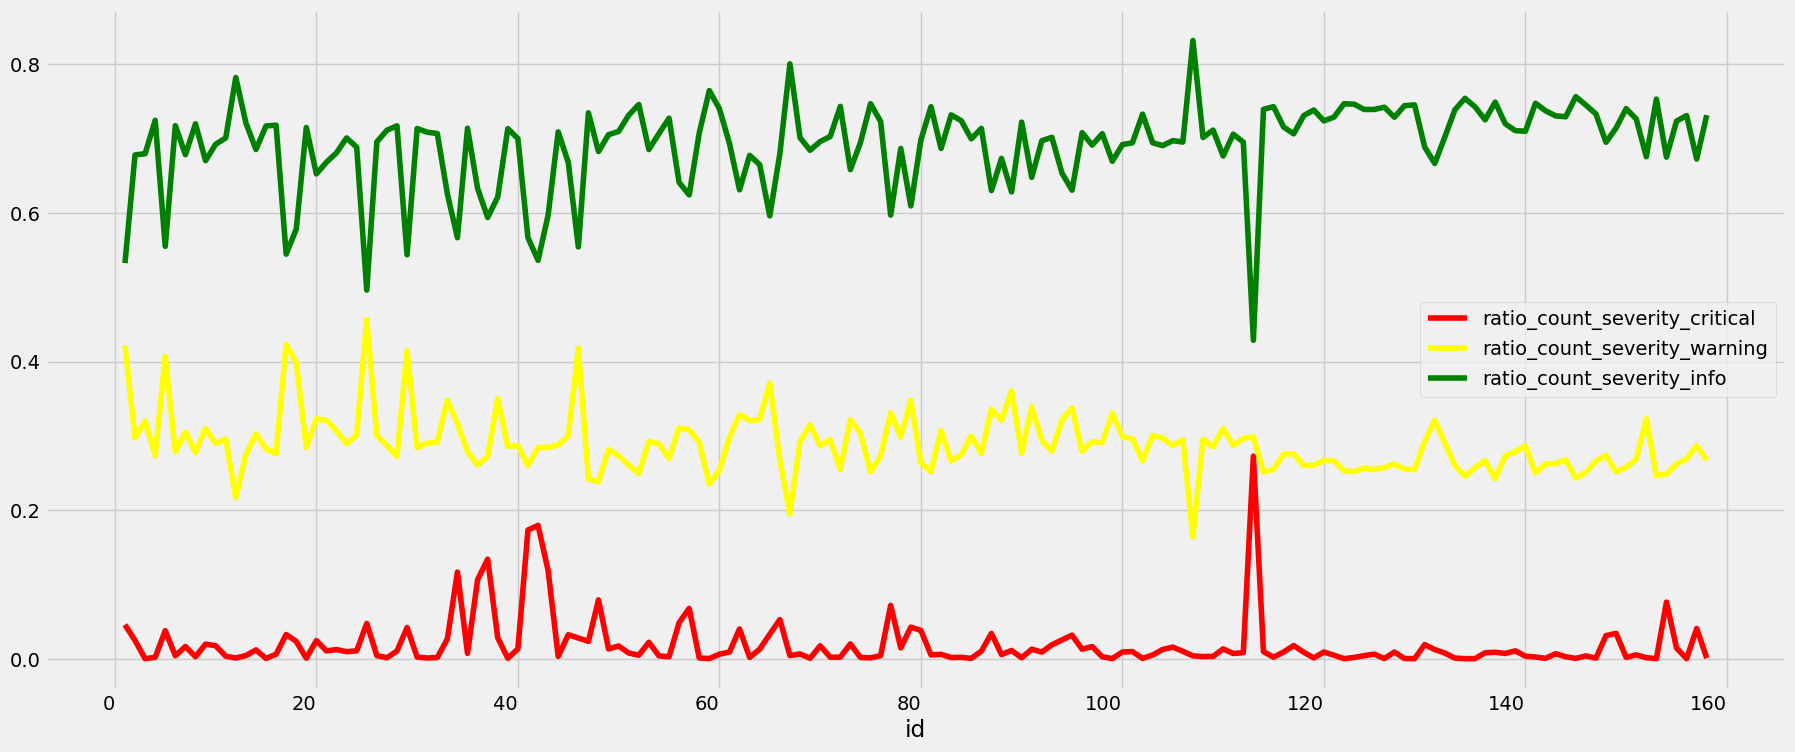

In [51]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='ratio_count_severity_critical',color='red', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_warning',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_info',color='green', ax=ax)

In [54]:
def ratio_normalized(data, severity_name, window):
    data[f'ratio_count_{severity_name}_normalized'] = data[f'ratio_count_{severity_name}'].rolling(min_periods=1, window=window).mean()

In [69]:
window = 5
ratio_normalized(data, 'severity_critical', window)
ratio_normalized(data, 'severity_warning', window)
ratio_normalized(data, 'severity_info', window)

data.fillna(0)

/tmp/ipykernel_79595/2633684144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}_normalized'] = data[f'ratio_count_{severity_name}'].rolling(min_periods=1, window=window).mean()


,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps,count_total_normalized,count_severity_info_normalized,count_severity_warning_normalized,count_severity_critical_normalized,ratio_count_severity_info,ratio_count_severity_warning,ratio_count_severity_critical,state,state_normalized,ratio_count_severity_critical_normalized,ratio_count_severity_warning_normalized,ratio_count_severity_info_normalized,state_mean,state_mean_normalized
id,,,,,,,,,,,,,,,,,,,,
1,2022-05-20,35618,18964,15022,1632,NPS_1,0.511705,0.406802,0.654066,0.265386,0.532427,0.421753,0.045820,0.431594,0.584203,0.045820,0.421753,0.532427,0.431594,1.000000
2,2022-05-29,13275,9001,3947,327,NPS_1,0.189630,0.192337,0.170632,0.052914,0.678041,0.297326,0.024633,0.301380,0.299680,0.035226,0.359539,0.605234,0.366377,0.631813
3,2022-05-02,49305,33512,15785,8,NPS_1,0.709004,0.719966,0.687372,0.000977,0.679688,0.320150,0.000162,0.320150,0.340694,0.023538,0.346410,0.630052,0.349594,0.537062
4,2022-05-03,10553,7647,2885,21,NPS_1,0.150392,0.163190,0.124274,0.003093,0.724628,0.273382,0.001990,0.273411,0.238567,0.018151,0.328153,0.653696,0.330155,0.427317
5,2022-05-23,20994,11652,8548,794,NPS_1,0.300899,0.249403,0.371470,0.128948,0.555016,0.407164,0.037820,0.414130,0.546044,0.022085,0.343955,0.633960,0.346779,0.521174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022-03-23,34099,23017,8481,2601,NPS_1,0.489809,0.494048,0.368545,0.423152,0.675005,0.248717,0.076278,0.291776,0.278696,0.017041,0.268859,0.714100,0.271011,0.093417
155,2022-03-24,17740,12836,4648,256,NPS_1,0.253993,0.274890,0.201231,0.041355,0.723563,0.262007,0.014431,0.263592,0.217111,0.019545,0.269712,0.710743,0.272530,0.101995
156,2022-03-30,11069,8091,2976,2,NPS_1,0.157830,0.172748,0.128247,0.000000,0.730960,0.268859,0.000181,0.268859,0.228621,0.018525,0.269812,0.711663,0.272344,0.100945


<AxesSubplot:xlabel='id'>

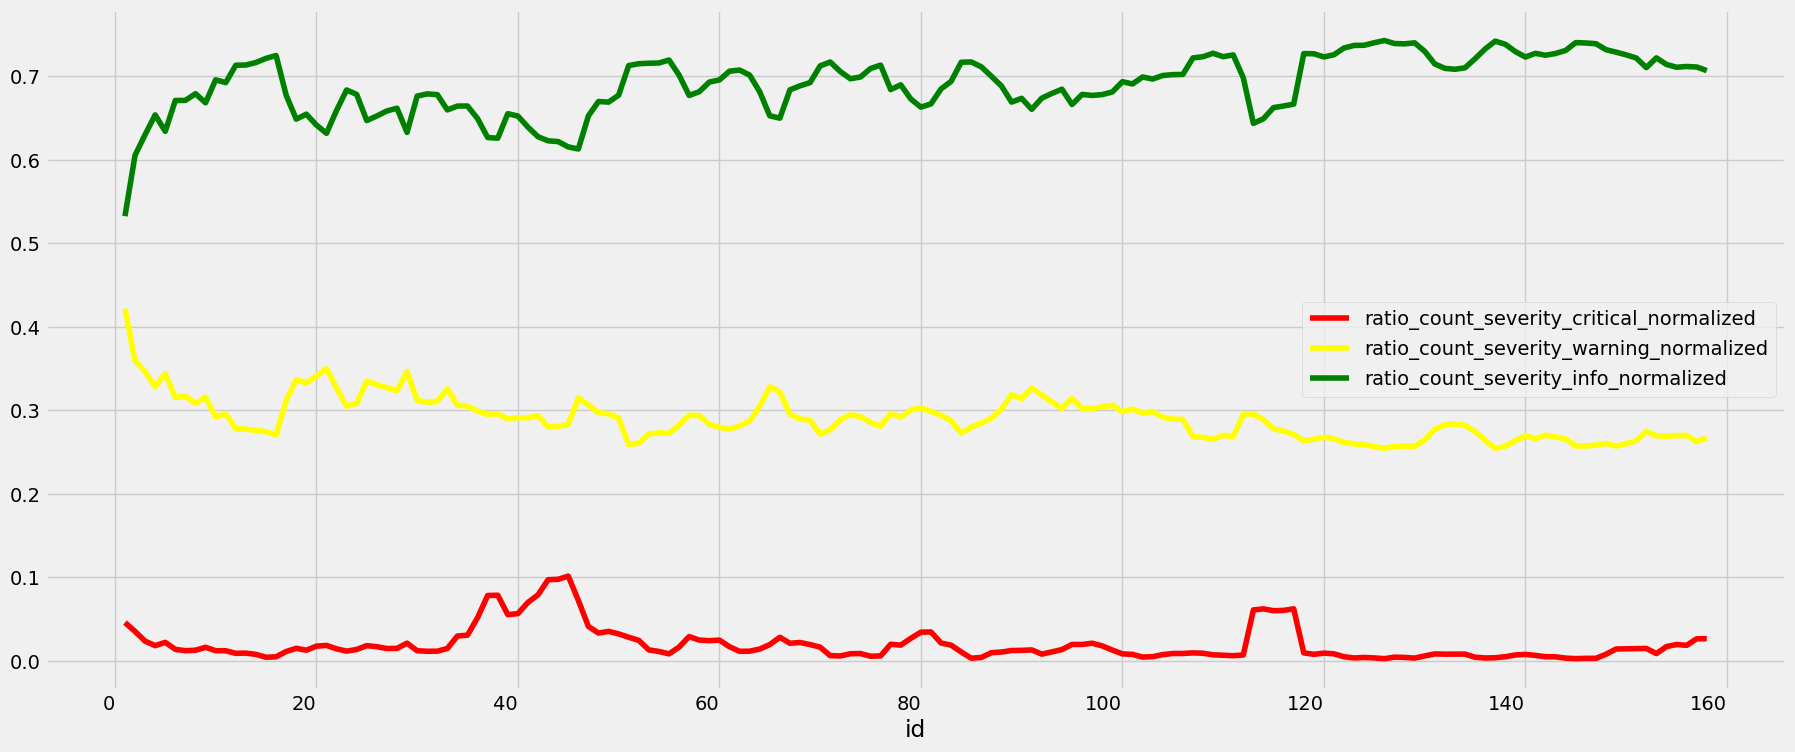

In [70]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='ratio_count_severity_critical_normalized',color='red', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_warning_normalized',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_info_normalized',color='green', ax=ax)

In [71]:
from numpy import sqrt

# Коэффициент выравнивающий масштаб аварийных и предупредительных сообщений**
A = 2

# Функция расчёта модели показателя нештатной работоспособности станции
def state_mean(data):
    data['state_mean'] = sqrt((A*data['ratio_count_severity_critical_normalized'])**2 + data['ratio_count_severity_warning_normalized']**2)

In [72]:
state_mean(data)

/tmp/ipykernel_79595/2946605705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_mean'] = sqrt((A*data['ratio_count_severity_critical_normalized'])**2 + data['ratio_count_severity_warning_normalized']**2)


In [73]:
data['state_mean_normalized'] = (data['state_mean'] - data['state_mean'].min()) / (data['state_mean'].max() - data['state_mean'].min())


/tmp/ipykernel_79595/2122206888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_mean_normalized'] = (data['state_mean'] - data['state_mean'].min()) / (data['state_mean'].max() - data['state_mean'].min())


<AxesSubplot:xlabel='id'>

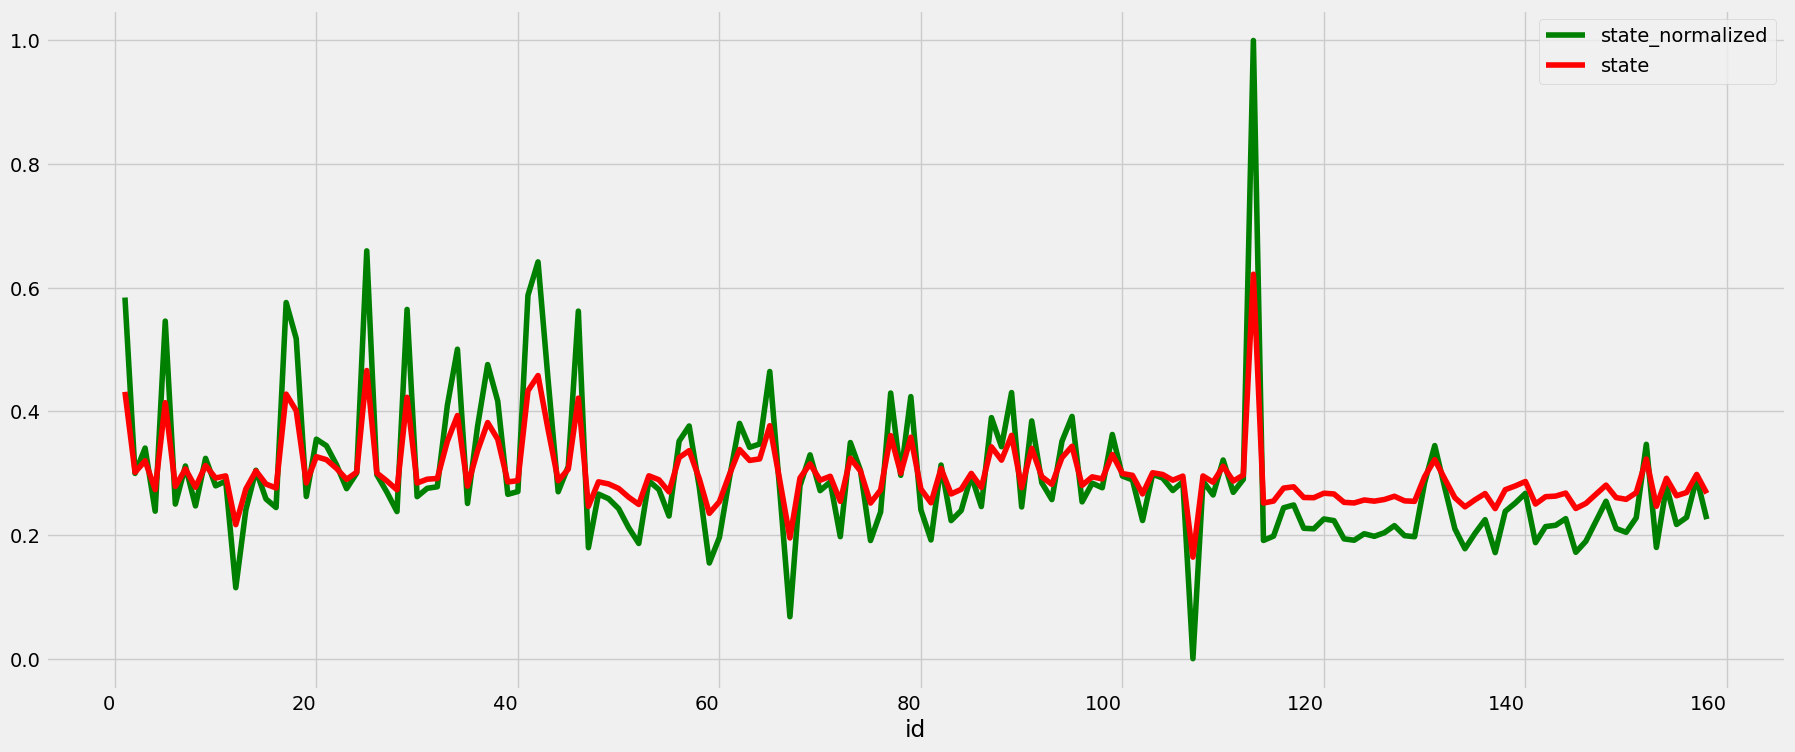

In [75]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='state_normalized',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='state',color='red', ax=ax)